
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Data set: No-show appointments

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

Data Dictionary:

01 - PatientId

02 - AppointmentID 

03 - Gender

04 - ScheduledDay

05 - AppointmentDay

06 - Age 

07 - Neighbourhood 

08 - Scholarship 

09 - Hipertension

10 - Diabetes

11- Alcoholism

12- Handcap

13- SMS_received

14- No-show



### Question(s) for Analysis

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

2. Are these factors correlated or not?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling



#### Load the data set and check the datatypes, whether there are missing values, duplicated rows, etc.

In [2]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df = pd.read_csv('KaggleV2-May-2016.csv', parse_dates = ['ScheduledDay','AppointmentDay'])
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.tail(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# set the patientid and appointmentid into index so that the data frame is easier to handle later
df.set_index(['PatientId', 'AppointmentID'], inplace = True)

In [5]:
df.head()

,,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,AppointmentID,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# check whether the data set contains nan and the shape and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 110527 entries, (29872499824296.0, 5642903) to (377511518121127.0, 5629448)
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2

From the info above we can see that our dataframe does not have null values. In the following we will check whether our dataframe contains duplicated rows.

In [9]:
# check whether the data set contains duplicated rows
sum(df.duplicated())

635

Now we can see that our dataframe does not have duplicated rows and we have change the datatype of the two correspoding date columns from string to datetime64.

In the following we will investigate the range of each column to find potential outliers.

In [10]:
# check the ranges of the numeric columns
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,86.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that the 'Age' column has minimum value -1, which is an outlier. And the 'Handcap' column which is supposed to be of values 0 and 1, but has maximum '4', which is also an outlier. 


### Data Cleaning

#### Potiential problems

From the describe info, we observe that for the 'Age' column the minimum age is '-1', which is impossible. And for the 'Handcap' column, the maximum value is 4, which is incorrect since the maximum should be 1 indicating True. For the 'ScheduleDay' column, the oldest schedule day is in 2015 and it is of small portion, which might also indicate a outlier.


We first address the outliers problems in the 'Handcap' and 'Age' columns as mentioned above.
 

In [11]:
# clean the outliers of 'Age' and 'Handcap'
df.query('Age >= 0', inplace = True)
df.query('Handcap in [0,1]', inplace = True)

#### Check for other potential outliers of the data set.

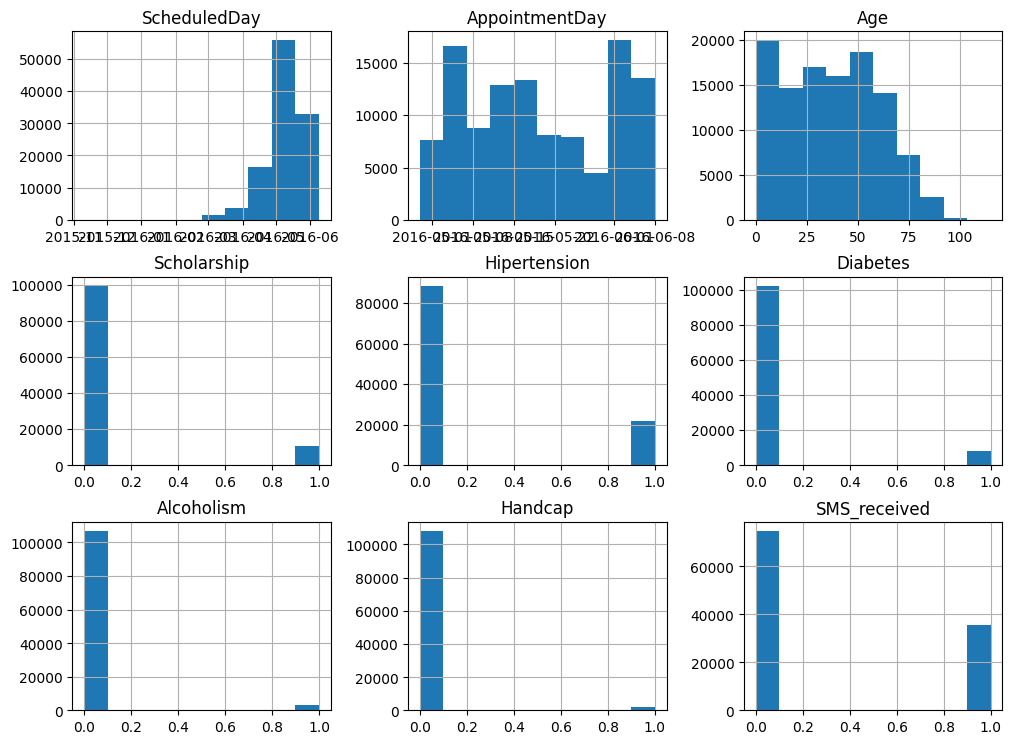

In [12]:
# plot the histogram of the columns of the dataframe
hist = df.hist(figsize = (12,12), layout = (4,3))

We can see fromm above that the 'ScheduledDay' column has extreme value. We further plot its single histogram to explore this column.

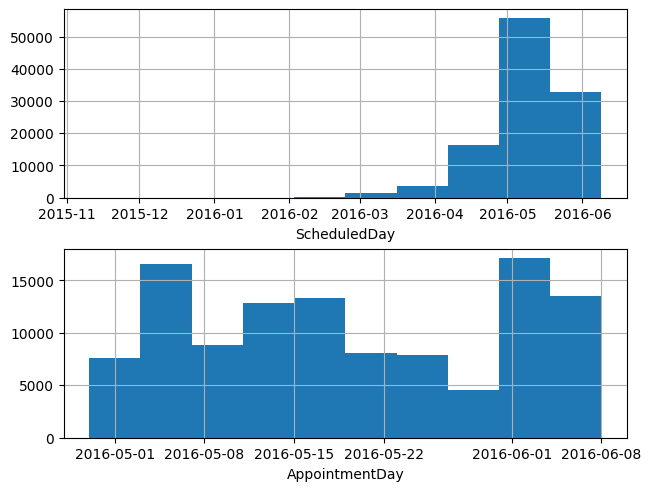

In [13]:
fig, axes = plt.subplots(nrows = 2,layout='constrained')

df['ScheduledDay'].hist(ax = axes[0])
axes[0].set_xlabel('ScheduledDay')
df['AppointmentDay'].hist(ax = axes[1])
axes[1].set_xlabel('AppointmentDay')
plt.show()

We can see that the 'ScheduledDay' column has extreme small value before '2016-02'. However, 'ScheduledDay' should happen after 'AppointmentDay', which has oldest value in '2016-05'. Thus we remove the value of 'ScheduleDay' which are before 2016-02.

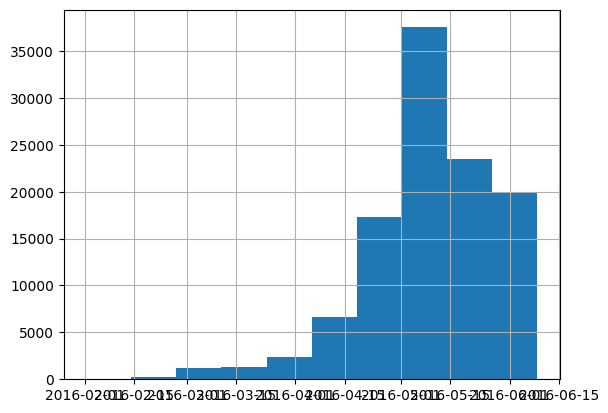

In [14]:
# remove 'ScheduledDay'of value before '2016-02'
mask = df['ScheduledDay'] >= '2016-02'
df = df[mask]
# plot the histogram again to see it worked
df['ScheduledDay'].hist();

We can see that the unreasonable ScheduledDay are removed. 
Now we check the values of the columns of categorial values and see whether they make sense.

In [15]:
print('Values of Gender:', df['Gender'].unique(), '\n')
print('Values of Neighbourhoods:', df['Neighbourhood'].unique(), '\n')
print('Values of Noshow:', df['No-show'].unique())

Values of Gender: ['F' 'M'] 

Values of Neighbourhoods: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TE

We can see that they all make sense and there are no potential outliers.

<a id='eda'></a>
## Exploratory Data Analysis





> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1:  What factors are important for us to know in order to predict if a patient will show up for their appointment?

#### Main ideas:

1. To utilize the 'ScheduledDay' and the 'AppointmentDay' columns, we create a time duration column indicating the difference betwee the difference these columns. The reason is that the duration from the 'AppointmentDay' to the 'ScheduledDay' can be the reason why people are not showing up. An underlying issue of the data set is that while logically speaking the 'AppointmentDay' should happen before the 'ScheduledDay', but there are 65% of the data which are not the case. It would be unreasonable to deleted all these data, and what matters to us is the time difference instead of the order, thus we take the absolute value of the time difference regardless of whether the 'ScheduledDay' and 'AppointmentDay' are in correct order.

2. To find out what might be the reasons for patients not showing up, we need to explore the relation between the 'No-show' column and other columns. And we do this by create two dataframe. One consists of patients who show up and the other consists of patients not showing up, and check whether there are difference between these two dataframes.

2. We separate the factors into numeric factors and categorial factors, and explore their relations with the 'No-show' column using different methods.

In [16]:
# check the order of the 'ScheduledDay' and 'AppointmentDay'
# compute the percentage when the scheduledDay is before the AppointmentDay and it is unreasonable.
print('Unreasonable data percentage:', sum(df['ScheduledDay'] < df['AppointmentDay'])/len(df['ScheduledDay']))
# compute the reasonable percentage
print('Reasonable data percentage:', sum(df['ScheduledDay'] >= df['AppointmentDay'])/len(df['ScheduledDay']))

Unreasonable data percentage: 0.6507417993738941
Reasonable data percentage: 0.3492582006261059


We can see from above that both two data sets are large and we don't want to disgard any of them. In order to use them all in a resonable way, we create a column which is their absolute time difference, and this column indicates the time duration form the appointment day to the scheduled day.

In [17]:
# create a time duration column
duration = abs(df['ScheduledDay'] - df['AppointmentDay']).apply(lambda x: round(x.total_seconds()/(60),2))
df['Duration(mins)'] = duration
df.head(1)

,,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration(mins)
PatientId,AppointmentID,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1118.13


In [18]:
# drop the 'ScheduledDay' and 'AppointmentDay' columns
df.drop(columns = ['ScheduledDay', 'AppointmentDay'], inplace = True)
df.head(1)

,,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration(mins)
PatientId,AppointmentID,,,,,,,,,,,
2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1118.13


Now we separate the dataframe into two. One consists of showing up data and the other consists of not showing up data.

In [19]:
# seperate the show and no show case into two dataframes and explore their association

mask1 = df['No-show'] == 'No'
df_show = df[mask1]
mask2 = df['No-show'] == 'Yes'
df_noshow = df[mask2]


In [20]:
df_show.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87964 entries, (29872499824296.0, 5642903) to (377511518121127.0, 5629448)
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          87964 non-null  object 
 1   Age             87964 non-null  int64  
 2   Neighbourhood   87964 non-null  object 
 3   Scholarship     87964 non-null  int64  
 4   Hipertension    87964 non-null  int64  
 5   Diabetes        87964 non-null  int64  
 6   Alcoholism      87964 non-null  int64  
 7   Handcap         87964 non-null  int64  
 8   SMS_received    87964 non-null  int64  
 9   No-show         87964 non-null  object 
 10  Duration(mins)  87964 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 15.4+ MB


In [21]:
df_show.head()

,,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration(mins)
PatientId,AppointmentID,,,,,,,,,,,
2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1118.13
5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,968.45
4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,979.07
8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1049.52
8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,967.38


In [22]:
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22241 entries, (733688164476661.0, 5630279) to (69237724436761.0, 5780205)
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          22241 non-null  object 
 1   Age             22241 non-null  int64  
 2   Neighbourhood   22241 non-null  object 
 3   Scholarship     22241 non-null  int64  
 4   Hipertension    22241 non-null  int64  
 5   Diabetes        22241 non-null  int64  
 6   Alcoholism      22241 non-null  int64  
 7   Handcap         22241 non-null  int64  
 8   SMS_received    22241 non-null  int64  
 9   No-show         22241 non-null  object 
 10  Duration(mins)  22241 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 9.4+ MB


In [23]:
df_noshow.head()

,,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration(mins)
PatientId,AppointmentID,,,,,,,,,,,
7.336882e+14,5630279,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1974.80
3.449833e+12,5630575,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1940.03
7.542951e+12,5620163,M,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,3795.80
1.479497e+13,5633460,F,40,CONQUISTA,1,0,0,0,0,0,Yes,871.05
6.222575e+14,5626083,F,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,2408.77


Explore the relation of numeric columns and the two data frames.

In [24]:
df_show.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
count,87964.000000,87964.000000,87964.000000,87964.000000,87964.000000,87964.000000,87964.000000,87964.000000
mean,37.753035,0.093891,0.203640,0.073485,0.030422,0.018996,0.291119,12295.027227
std,23.318546,0.291678,0.402707,0.260932,0.171745,0.136513,0.454281,19746.107649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,196.330000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,618.842500
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2332.355000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,16732.532500
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,176598.980000


In [25]:
df_noshow.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
count,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000,22241.000000
mean,34.249449,0.115777,0.167394,0.063846,0.030259,0.016321,0.438335,21895.699582
std,21.917436,0.319965,0.373335,0.244484,0.171304,0.126710,0.496194,22548.415621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,199.220000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4959.530000
50%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14836.250000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,32589.930000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,157311.880000


Compare the mean values of the numeric columns between the two dataframes. More precisely, compare their change of percentage.

In [26]:
diff = \
((df_noshow.describe().loc['mean',:] - df_show.describe().loc['mean',:])\
 /df_show.describe().loc['mean',:])*100
diff

Age               -9.280277
Scholarship       23.310605
Hipertension     -17.799328
Diabetes         -13.116430
Alcoholism        -0.532864
Handcap          -14.082658
SMS_received      50.568828
Duration(mins)    78.085816
Name: mean, dtype: float64

##### Observations

From above we can see that among all patients, those not showing up have bigger values in the following factors: Duration, SMS_received, Scholarship, and smaller values in the factors: Age, Hipertension, Diabetes, Alcoholism, Handcap. 

More precisely, compared with the patients showing up, the patients not showing up received 23% more scholarship, the duration between their appointment time and scheduled time are 78% longer, and received 50% more SMS. On the other hand, they are 9% younger, have 17% less Hipertension, 13% less Diabetes, 0.5% less Alcoholism, 14% less Handcap.

We can plot a pie to make this clearer.

In [27]:
diff.sort_values(ascending = False)

Duration(mins)    78.085816
SMS_received      50.568828
Scholarship       23.310605
Alcoholism        -0.532864
Age               -9.280277
Diabetes         -13.116430
Handcap          -14.082658
Hipertension     -17.799328
Name: mean, dtype: float64

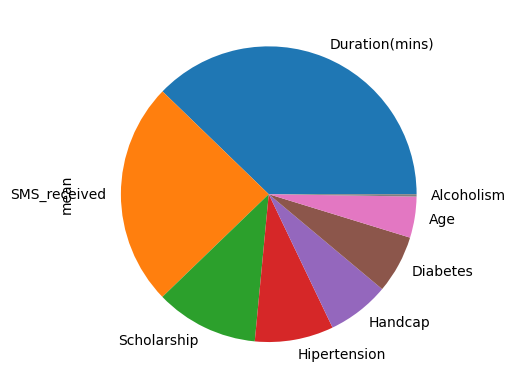

In [28]:
abs(diff).sort_values(ascending = False).plot.pie(y = 'mean');

##### Concluison

We can see from above that the three most changed factor are 'Durations', 'SMS_received' and 'Scholarship'. More precisely, among all patients, those no showing up has 78% more time duration than those showing up, and 50% more SMS received, and 23% more scholarship.

Our observations make sense to some extend:
It makes sense that younger and those people who do not have diesease tend not to show up for appointments. In addition, the dieseases are also correlated with age. For example, Hipertension, Diabetes, 


And the longer duration between the appointment day and the scheduled day, the more likely that a patient would not show up. And the higher value of Scholarship might be correlated with the patients being younger since the scholarship is for new born female children, and people who do not show up might have more SMS reminder, thus the higher number of SMS received.

### Relation between show up and categories columns.
Now we explore the categorial columns 'Gender', 'Neighbourhood' and their relation with whether patients show up or not.

#### Relationship between Gender and show up or not.

We first deal with the 'Gender' column, and see whether gender affects whether people show up or not. 

In [29]:
df_noshow.groupby('Gender').size()

Gender
F    14544
M     7697
dtype: int64

In [30]:
# compute the percentage of female among no show people
df_noshow.groupby('Gender').size()[0]/len(df_noshow)

0.6539274313205341

In [31]:
df_show.groupby('Gender').size()

Gender
F    57101
M    30863
dtype: int64

In [32]:
# compute the percentage of female among show up people
df_show.groupby('Gender').size()[0]/len(df_show)

0.6491405575007958

#### Conclusion

We can see that among show up and not show up patients, they have similar percentage of female and male, thus 'Gender' might not be an important factor for showing up or not.

#### Relation between Neighbourhood and show up or not.

Now we take a look at the 'Neighbourhood' column. 

We invewstigate the relation between 'Neighbourhood' and 'No-show' in two ways:

The first way is to find the percentage of each neighbourhood among the total population, the show up population and the no show population respectively and compare them. If they differ significantly, then neighbourhood is an important factor affecting whether people show up or not.

The second way is to find the top 5 biggest neighbourhoods of the total population, the show up population and the no show population respectively. Then we compare them and see whether there are differences or not.


##### Compute the percentage of neighbourhoods among total, show up and no show.

We first try the first approach and compute the the percentage of each neighbourhood among the total population, the show up population and the no show population.

In [33]:
# compute the percentages of each neighbourhood among all people
total_nei = (df.groupby('Neighbourhood').size()/len(df))*100
# compute the percentages of each neighbourhood among all showed up people
show_nei = (df_show.groupby('Neighbourhood').size()/len(df_show))*100
# compute the percentages of each neighbourhood among all not showed up people
noshow_nei = (df_noshow.groupby('Neighbourhood').size()/len(df_noshow))*100
# put them together into a dataframe
nei = pd.DataFrame({"total": total_nei,
                    "showup": show_nei,
                    "noshow": noshow_nei
    
})
nei

,total,showup,noshow
Neighbourhood,,,
AEROPORTO,0.007259,0.007958,0.004496
ANDORINHAS,2.046187,1.972398,2.338024
ANTÔNIO HONÓRIO,0.245905,0.251239,0.224810
ARIOVALDO FAVALESSA,0.255887,0.250102,0.278764
BARRO VERMELHO,0.383830,0.377427,0.409154
...,...,...,...
SÃO JOSÉ,1.790300,1.758674,1.915382
SÃO PEDRO,2.207704,2.183848,2.302055
TABUAZEIRO,2.833810,2.900050,2.571827


We now compare the show up and no show neighbourhoods with the total neighbourhoods.

In [34]:
# compare the difference between the percentages of neighbourhoods
# between show up and total, no show and total
nei_diff = pd.DataFrame({"show - total": nei['showup'] - nei['total'],
                         "noshow - total": nei['noshow'] - nei['total']
                        })
nei_diff

,show - total,noshow - total
Neighbourhood,,
AEROPORTO,0.000699,-0.002763
ANDORINHAS,-0.073789,0.291838
ANTÔNIO HONÓRIO,0.005334,-0.021095
ARIOVALDO FAVALESSA,-0.005784,0.022878
BARRO VERMELHO,-0.006403,0.025324
...,...,...
SÃO JOSÉ,-0.031626,0.125082
SÃO PEDRO,-0.023856,0.094351
TABUAZEIRO,0.066240,-0.261983


In [35]:
# sort the difference between show up and total 
nei_diff['show - total'].sort_values()

Neighbourhood
ITARARÉ                       -0.242412
JESUS DE NAZARETH             -0.136902
SANTOS DUMONT                 -0.127427
CARATOÍRA                     -0.082025
ILHA DO PRÍNCIPE              -0.079692
                                 ...   
SANTO ANTÔNIO                  0.080465
JARDIM CAMBURI                 0.104360
SANTA MARTHA                   0.156029
JARDIM DA PENHA                0.170780
ILHAS OCEÂNICAS DE TRINDADE         NaN
Name: show - total, Length: 81, dtype: float64

We can see from above that there are no big difference show up neighbourhoods and total neighbourhoods. Now we check the difference between no show up people and the total people.

In [36]:
# sort the difference between no show up and total 
nei_diff['noshow - total'].sort_values()

Neighbourhood
JARDIM DA PENHA     -0.675442
SANTA MARTHA        -0.617101
JARDIM CAMBURI      -0.412748
SANTO ANTÔNIO       -0.318240
TABUAZEIRO          -0.261983
                       ...   
CARATOÍRA            0.324411
SANTOS DUMONT        0.503978
JESUS DE NAZARETH    0.541451
ITARARÉ              0.958750
PARQUE INDUSTRIAL         NaN
Name: noshow - total, Length: 81, dtype: float64

##### Conclusion

We can see that the difference between no show people and total people are significantly bigger than the show up people and total people. Among them, 'ITARARÉ' has 1% more no show people than the total population, and 'JARDIM DA PENHA' has 0.7% less no show people than the total population. We can conclude that neighbourhood is a factor influencing whether people show up or not.

##### Compute the top 5 neighbourhoods among total, show up and no show.

Now we try the second approach. We get the top 5 neighbourhoods of each group(total, show up, no show) and compare them.

In [37]:
# get the top 5 neighbourhoods of all people and sum up other neighbourhoods into others
total_nei = df.groupby('Neighbourhood').size().sort_values(ascending = False)[:5]
# sum up other neighbourhoods into others
total_nei['Others'] = df.groupby('Neighbourhood').size().sort_values(ascending = False)[5:].sum()
total_nei

Neighbourhood
JARDIM CAMBURI      7714
MARIA ORTIZ         5805
RESISTÊNCIA         4415
JARDIM DA PENHA     3871
ITARARÉ             3507
Others             84893
dtype: int64

In [38]:
# get the top 5 neighbourhoods of not show up and sum up other neighbourhoods into others
noshow_nei = df_noshow.groupby('Neighbourhood').size().sort_values(ascending = False)[:5]
noshow_nei['Others'] = df_noshow.groupby('Neighbourhood').size().sort_values(ascending = False)[5:].sum()
noshow_nei

Neighbourhood
JARDIM CAMBURI     1465
MARIA ORTIZ        1219
ITARARÉ             921
RESISTÊNCIA         903
CENTRO              699
Others            17034
dtype: int64

In [39]:
# get the top 5 neighbourhoods of show up and sum up other neighbourhoods into others
show_nei = df_show.groupby('Neighbourhood').size().sort_values(ascending = False)[:5]
show_nei['Others'] = df_show.groupby('Neighbourhood').size().sort_values(ascending = False)[5:].sum()
show_nei

Neighbourhood
JARDIM CAMBURI      6249
MARIA ORTIZ         4586
RESISTÊNCIA         3512
JARDIM DA PENHA     3240
CENTRO              2628
Others             67749
dtype: int64

Combine them into a dataframe and plot a pie chart to compare them.

In [40]:
# combine three groups into a dataframe
df_nei = pd.DataFrame({"total_nei": total_nei, 
                       "showup_nei": show_nei, 
                       "noshow_nei": noshow_nei})
df_nei

,total_nei,showup_nei,noshow_nei
Neighbourhood,,,
CENTRO,NaN,2628.0,699.0
ITARARÉ,3507.0,NaN,921.0
JARDIM CAMBURI,7714.0,6249.0,1465.0
JARDIM DA PENHA,3871.0,3240.0,NaN
MARIA ORTIZ,5805.0,4586.0,1219.0
Others,84893.0,67749.0,17034.0
RESISTÊNCIA,4415.0,3512.0,903.0


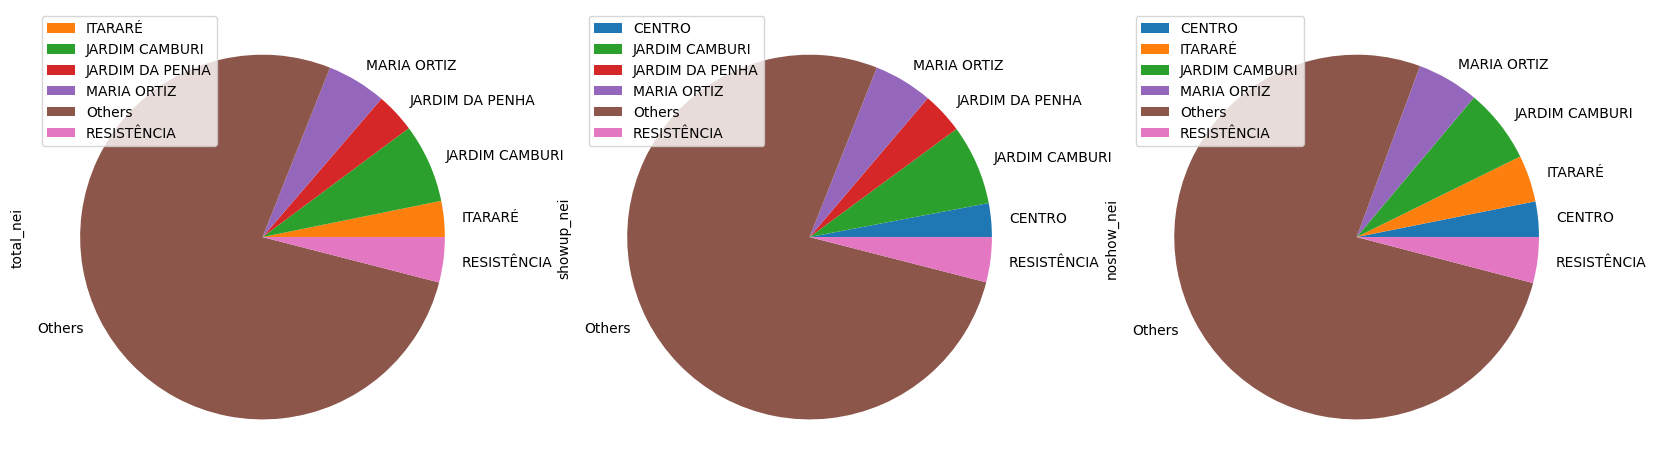

In [41]:
df_nei.plot.pie(subplots = True,figsize=(20, 15));

##### Conclusion

We can see from the chart that the show up pie is quite similar with the toal pie, while compared with the totoal pie chart, the no show pie the 'JARDIM DA PENHA' neighbourhood disappears and the 'ITARARÉ' neighbourhoos has larger portion. This is in lie with our conclusion in the first approach.

### Research Question 2 : Are there any correlation between the variables?

##### Correlation between numeric variables.

We first compute the correlation between numeric variables.

In [42]:
# compute the correlation matrix
corr = df.corr(numeric_only = True)
corr

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
Age,1.000000,-0.091949,0.503164,0.291837,0.095908,0.081397,0.012407,0.024733
Scholarship,-0.091949,1.000000,-0.019104,-0.024486,0.035291,-0.009048,0.001119,-0.030861
Hipertension,0.503164,-0.019104,1.000000,0.432565,0.088433,0.080903,-0.007168,-0.031844
Diabetes,0.291837,-0.024486,0.432565,1.000000,0.018750,0.054538,-0.015041,-0.031942
Alcoholism,0.095908,0.035291,0.088433,0.018750,1.000000,0.002824,-0.026098,-0.039132
Handcap,0.081397,-0.009048,0.080903,0.054538,0.002824,1.000000,-0.024345,-0.024254
SMS_received,0.012407,0.001119,-0.007168,-0.015041,-0.026098,-0.024345,1.000000,0.401086
Duration(mins),0.024733,-0.030861,-0.031844,-0.031942,-0.039132,-0.024254,0.401086,1.000000


Now we plot a heatmap of the correlation.

In [ ]:
# plot the correlation heatmap

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap',  fontdict={'fontsize':12}, pad=12);

##### Conclusion

We can see that there are a strong correlation between 'Age', 'Hipertension', and 'Diatetes', which is what we expected. And there is also a correlation between 'Duration' and 'SMS_received', which indicates that the longer the time between appointment day and the scheduled day, the more SMS would be sent out to the patient.`

##### Correlation between categorial variables Gender, Neighbourhood and other variables

We then explore the correlation between the categorial variables 'Gender', 'Neighbourhood' and other variables. 

In [44]:
# find the mean between female group and male group
df.groupby('Gender').mean(numeric_only = True )

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
Gender,,,,,,,,
F,38.857673,0.123302,0.212632,0.077730,0.017056,0.016442,0.336660,14651.285121
M,33.679772,0.051867,0.166027,0.060036,0.055161,0.022199,0.291416,13454.634517


In [45]:
# compute the difference between two groups
df.groupby('Gender').mean(numeric_only = True ).pct_change()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
Gender,,,,,,,,
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M,-0.133253,-0.579349,-0.219181,-0.227635,2.234038,0.350135,-0.134391,-0.081675


##### Conclusion

We can see that Alcoholism is correlated with gender. More precisely, the male group has higher portion of alcoholism, while other factors have no significant difference between female and male.

#### Relation between neighbourhood and other factors

We now explore the relation between the neighbourhoods and other variables.

In [46]:
# compute the mean of other variables for each neighbourhood group
diff_nei = df.groupby('Neighbourhood').mean(numeric_only = True )
diff_nei

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Duration(mins)
Neighbourhood,,,,,,,,
AEROPORTO,53.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,20942.037500
ANDORINHAS,36.041685,0.143237,0.258980,0.132594,0.021729,0.032816,0.251441,12361.688497
ANTÔNIO HONÓRIO,36.845018,0.051661,0.018450,0.011070,0.000000,0.003690,0.343173,19439.306421
ARIOVALDO FAVALESSA,32.847518,0.184397,0.131206,0.067376,0.049645,0.039007,0.202128,10101.406241
BARRO VERMELHO,45.040189,0.000000,0.134752,0.054374,0.004728,0.014184,0.338061,10353.477021
...,...,...,...,...,...,...,...,...
SÃO JOSÉ,33.557020,0.091232,0.258490,0.120122,0.041561,0.035986,0.339078,8867.063933
SÃO PEDRO,36.033703,0.131525,0.273325,0.102343,0.061652,0.026716,0.284834,7579.510933
TABUAZEIRO,34.962856,0.171950,0.227025,0.076209,0.018252,0.024015,0.306116,12651.186113


In [55]:
# compute the standard deviation of each column
diff_nei.std()

Age                  5.724181
Scholarship          0.072952
Hipertension         0.090281
Diabetes             0.036034
Alcoholism           0.029045
Handcap              0.018822
SMS_received         0.081656
Duration(mins)    5815.325256
dtype: float64

##### Conclusion

We can see that Age and Duration varies a lot between different neighbourhoods.

<a id='conclusions'></a>
## Conclusions

### What factors are important for people show up or not? And are those factors correlated or not?


We observed that people who do not show up are younger and have less diseases, which are themselves correlated. In addition, they have higher portion of scholarship, which is also correlated with age. What's more, they have longer time difference between the appointment day and the scheduled day, and received more SMS, which are also correlated factors.

We also observed that gender is not an important factor for people showing up or not and neighbourhoods affect people show up or not. In addition, gender highly correlated with alcoholism and neighbourhood is correlated with age and duration.

### Further improvements

All our conclusions are drawn from observations and we claim that they are significant by comparing the values. However, not any statistical test are performed, which makes our conclusions doubtful. to further improve our conclusions, we can perform some statstical test to see whether our observations are statistically significant.

In [48]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1023500 bytes to Investigate_a_Dataset.html
